In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import copy
from typing import Tuple
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
# observed data
z1, n1 = 11, 14
z2, n2 = 8, 14

In [5]:
# starting position
x_old = [0.3, 0.5]

# lists of steps
acc = list()
acc_df_dict = list()
rej = list()
all = list()
all_each_iter = list()
all_colors = list()
all_colors_each_iter = list()
all_markers = list()
all_markers_each_iter = list()

# number of iterations
iterations = 10000

# 2d proposal distribution variances
sigma1 = 0.2
sigma2 = 0.2


def prior(p: Tuple[float]):
    """
    Calculate prior probability of parameters p = (p1, p2)

    :param p: value of parameters
    :type p: float

    :return: prior probability of p = (p1, p2)
    :rtype: float
    """
    if 0 <= p[0] <= 1 and 0 <= p[1] <= 1:
        return 1.
    return 0.

def likelihood(p: Tuple[float]):
    """
    Calculate the value of the likelihood function

    :param p: value of parameter p = (p1, p2)
    :type p: Tuple[float]

    :return: likeklihood for given p = (p1, p2)
    :rtype: Tuple[float]
    """
    return (p[0]**z1) * ((1-p[0])**(n1-z1)) * (p[1]**z2) * ((1-p[1])**(n2-z2))

def proposal(p):
    """
    Generating a proposal value for the next step
    given the current parameter value.
    The proposal distribution is a gaussian
    having a mean: the current parameter value
    and a std of 0.1 (not to narrow, not to wide).

    :param p: current value of the parameter
    :type p: float

    :return: proposed value to step into
    :rtype: float
    """
    return np.random.multivariate_normal(p, [[sigma1, 0], [0, sigma2]], 1).tolist()[0]

def accept(x_old, x_new):
    """
    Deciding whether to accept the newly proposed value
    for the parameter to step into.

    :param x_old: old value of the parameter
    :type x_old: float

    :param x_new: new value of the paramter
    :type x_new: float

    :return: Whether to step into new value
    :rtype: bool
    """
    return np.random.uniform(0,1) < (x_new / x_old)

# executing MCMC
for i in range(iterations):
    # proposal of new parameters values
    x_new = proposal(x_old)
    # calcuating likelihoods of current and proposed parameters
    x_old_likelihood = likelihood(x_old)
    x_new_likelihood = likelihood(x_new)

    add_color = None
    # check whether to accept newly proposed parameters
    if accept(prior(x_old) * x_old_likelihood, prior(x_new) * x_new_likelihood):
        x_old = x_new
        acc.append(x_new)
        acc_df_dict.append(dict(p1 = x_new[0], p2 = x_new[1]))
        add_color = 'green'
    else:
        rej.append(x_new)
        add_color = 'red'

    all.append(x_new)
    all_each_iter.append(pd.DataFrame(copy.deepcopy(all), columns = ['p1', 'p2']))
    all_colors.append(add_color)
    all_colors_each_iter.append(copy.deepcopy(all_colors))

acc_df = pd.DataFrame.from_dict(acc_df_dict)

C:\Users\ilija\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ilija\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ilija\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

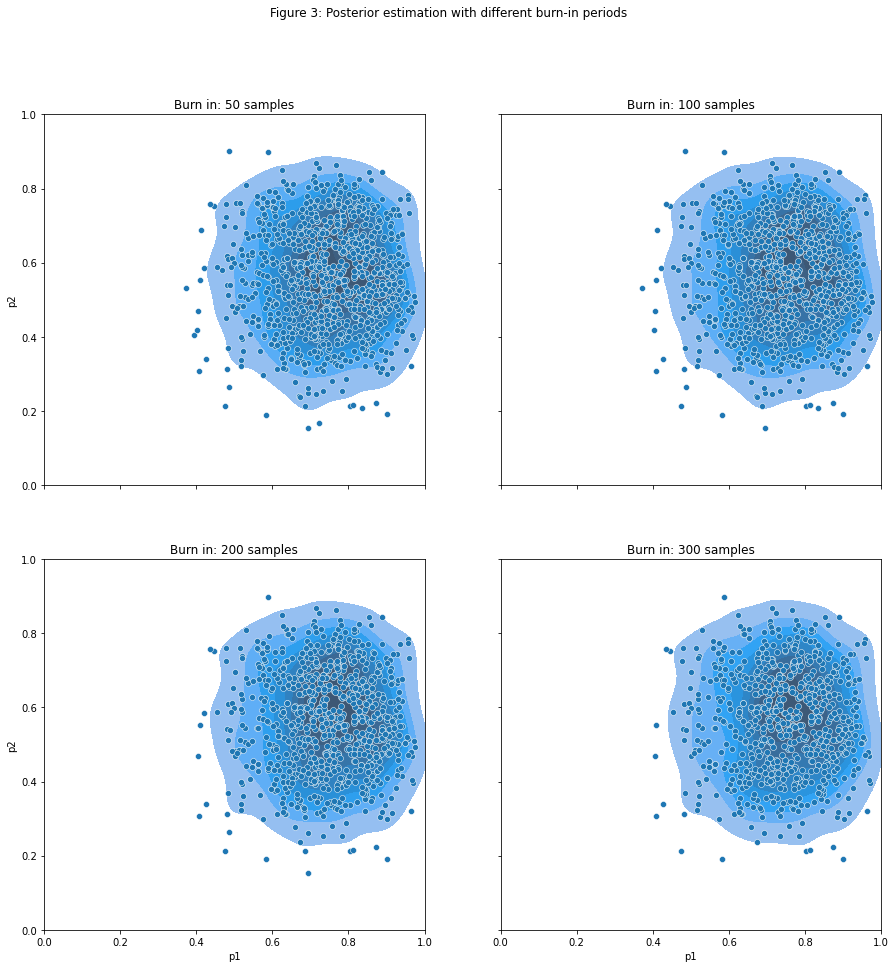

In [9]:
burn_50 = acc_df.iloc[50:]
burn_100 = acc_df.iloc[100:]
burn_200 = acc_df.iloc[200:]
burn_300 = acc_df.iloc[300:]

fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Figure 3: Posterior estimation with different burn-in periods")

sns.kdeplot(burn_50['p1'], burn_50['p2'], ax = axs[0,0], fill=True)
sns.kdeplot(burn_100['p1'], burn_50['p2'], ax = axs[0,1], fill=True)
sns.kdeplot(burn_200['p1'], burn_50['p2'], ax = axs[1,0], fill=True)
sns.kdeplot(burn_300['p1'], burn_50['p2'], ax = axs[1,1], fill=True)

sns.scatterplot(burn_50['p1'], burn_50['p2'], ax = axs[0,0])
sns.scatterplot(burn_100['p1'], burn_50['p2'], ax = axs[0,1])
sns.scatterplot(burn_200['p1'], burn_50['p2'], ax = axs[1,0])
sns.scatterplot(burn_300['p1'], burn_50['p2'], ax = axs[1,1])

axs[0, 0].set_title('Burn in: 50 samples')
axs[0, 1].set_title('Burn in: 100 samples')
axs[1, 0].set_title('Burn in: 200 samples')
axs[1, 1].set_title('Burn in: 300 samples')

axs[0, 0].set_xlim((0,1))
axs[0, 1].set_xlim((0,1))
axs[1, 0].set_xlim((0,1))
axs[1, 1].set_xlim((0,1))

axs[0, 0].set_ylim((0,1))
axs[0, 1].set_ylim((0,1))
axs[1, 0].set_ylim((0,1))
axs[1, 1].set_ylim((0,1))

for ax in axs.flat:
    ax.set(xlabel='p1', ylabel='p2')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('mcmc_plots/posterior_2d.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'mcmc_plots/steps_2d.gif'

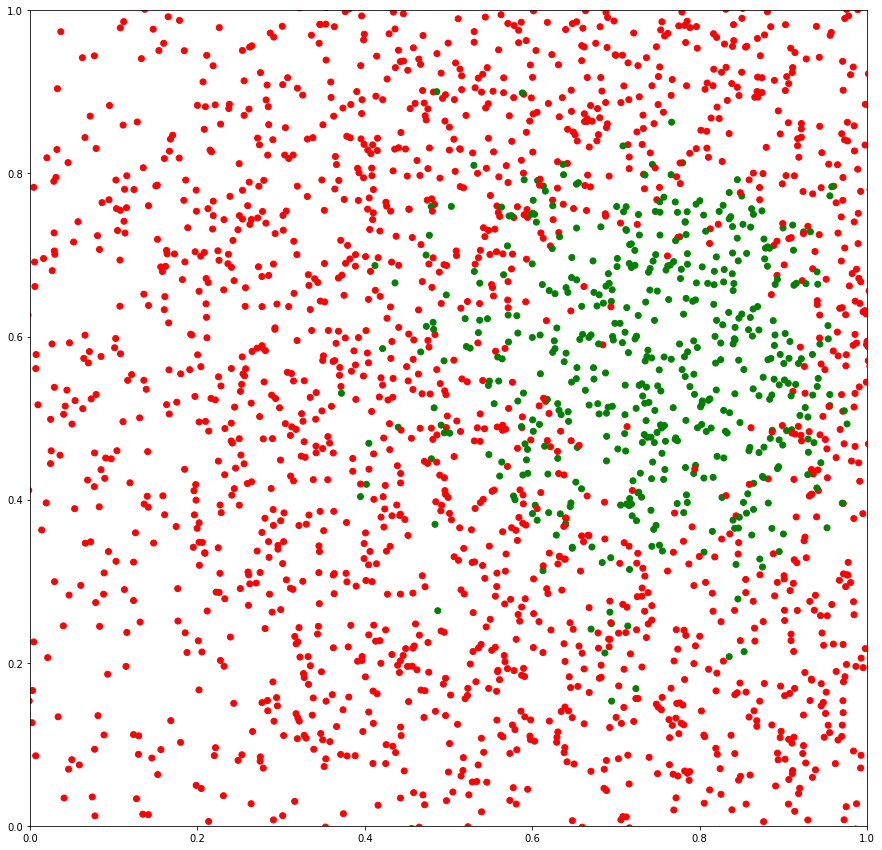

In [10]:
fig, ax = plt.subplots(figsize=(15,15))

def update(i):
    ax.clear()
    ax.scatter(all_each_iter[i]['p1'], all_each_iter[i]['p2'], c=all_colors_each_iter[i])
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))

ani = animation.FuncAnimation(fig, update, frames=iterations, interval=3)
ani.save('mcmc_plots/steps_2d.gif', writer='pillow')
plt.close()